# 데이터 집계와 시각화

### 주요 내용

1. 건수, 합계 평균 등 집계값 계산
2. 히스토그램, 상자그림, 막대그래프 등 그래프 작성 
3. 정렬 및 피벗테이블 활용

<br>

### 목표 
1. 집계값을 계산할 수 있다.
2. 적절한 그래프를 작성하고 올바르게 해석할 수 있다.
3. 피벗 테이블 등 다양한 방법으로 집계하고, 결과값을 적절히 정렬할 수 있다. 


<br>
<hr>
<br>

## 예제 및 실습 데이터 불러오기

In [1]:
# 데이터 불러오기
import pandas as pd
df_ins = pd.read_csv('data/insurance.csv')
df_ins.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [2]:
df_sp = pd.read_csv('data/StudentsPerformance.csv')
df_sp.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
# df_sp.describe()
# df_sp.describe(include='number')
df_sp.describe(include='object')

,gender,race/ethnicity,parental level of education,lunch,test preparation course
count,1000,1000,1000,1000,1000
unique,2,5,6,2,2
top,female,group C,some college,standard,none
freq,518,319,226,645,642


<br>

## 1. 수치형 변수의 집계값과 히스토그램

하나의 수치형 변수로 합계, 평균과 같은 집계값을 계산할 수 있고 히스토그램으로 분포를 확인


<br>

### 1.1. 수치형 변수의 집계값 계산

수치형 변수를 선택한 다음 sum( ), mean( ) 같은 메서드를 활용해서 단순한 집계값을 계산  
먼저 변수를 선택하고 다양한 집계 함수를 메서드로 활용

In [5]:
# 관심 변수 선택
df_ins['charges']

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [6]:
# 수치형 변수의 집계값 계산
    # mean( ) : 수치형 Series의 메서드
df_ins['charges'].mean()

13270.422265141257

In [7]:
df_ins['charges'].sum()

17755824.990759

In [8]:
# 분산과 표준편차계산
df_ins['charges'].var(), df_ins['charges'].std()

(146652372.1528548, 12110.011236693994)

In [9]:
# 관측치 수 계산하기
df_ins['charges'].count()

1338

<br>

### 1.2. 히스토그램 그리기

하나의 수치형변수의 분포를 파악하기 위해서 히스토그램을 활용  
Python에서 그래프를 그릴때는 기본적으로 matplotlib 라이브러리를 활용하지만, 좀 더 가독성이 좋고 그래프가 이쁜 seaborn 라이브러리를 추가로 활용   



<br>

#### 1.2.1. pandas의 메서드와 matplotlib을 활용한 그래프

In [10]:
# 라이브러리 불러오기
import matplotlib.pyplot as plt
import seaborn as sns

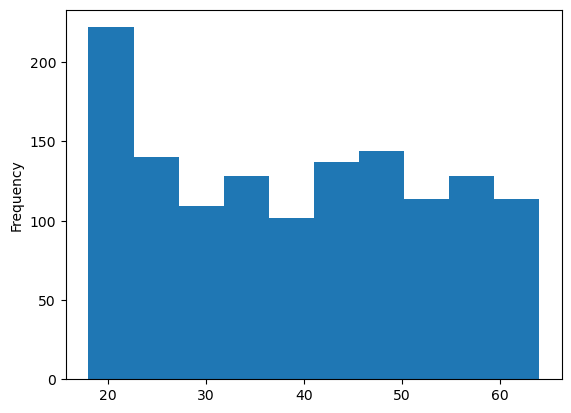

In [11]:
# 가장 간단한 히스토그램과 상자그림
    # DataFrame의 plot 메서드 활용
    # plt.show() : 최종 그래프 출력함수, 생략 가능
df_ins['age'].plot(kind='hist')
plt.show()

(array([222., 140., 109., 128., 102., 137., 144., 114., 128., 114.]),
 array([18. , 22.6, 27.2, 31.8, 36.4, 41. , 45.6, 50.2, 54.8, 59.4, 64. ]),
 <BarContainer object of 10 artists>)

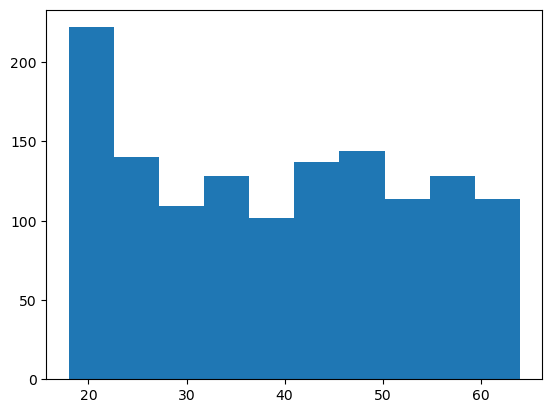

In [12]:
# matplotlib의 hist( )를 활용한 히스토그램 그리기
plt.hist(df_ins['age'])

<br>

#### 1.2.2. seaborn을 활용한 히스토그램

seaborn 라이브러리를 활용하면 그래프를 그리는 명령어가 좀 더 직관적이고 DataFrame 형식을 활용하기 편함

<Axes: xlabel='charges', ylabel='Count'>

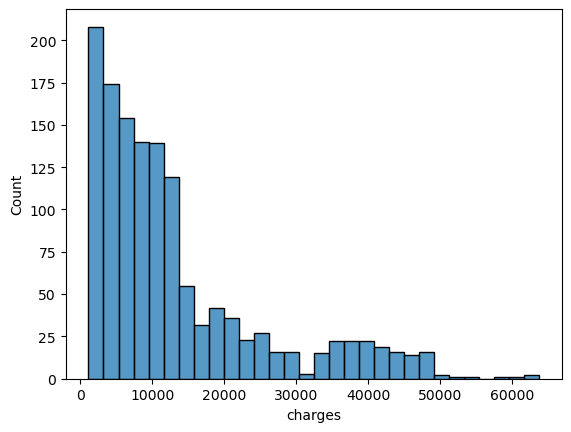

In [13]:
# histplot()을 활용한 히스토그램
sns.histplot(data=df_ins,
             x='charges')

<br>

#### [실습] 한 수치형 변수에 대한 요약과 시각화

1. df_sp에서 'math score'의 평균 계산하기

2. df_sp에서 'math score'의 히스토그램을 matplotlib으로 그려기

3. df_sp에서 'math score'의 히스토그램을 seaborn으로 그려기



In [14]:
df_sp['math score'].mean()

66.089

(array([  2.,   2.,  10.,  26.,  95., 188., 268., 216., 135.,  58.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <BarContainer object of 10 artists>)

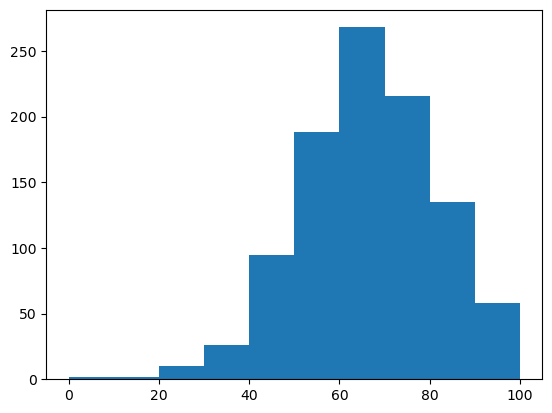

In [15]:
plt.hist(df_sp['math score'])

<Axes: xlabel='math score', ylabel='Count'>

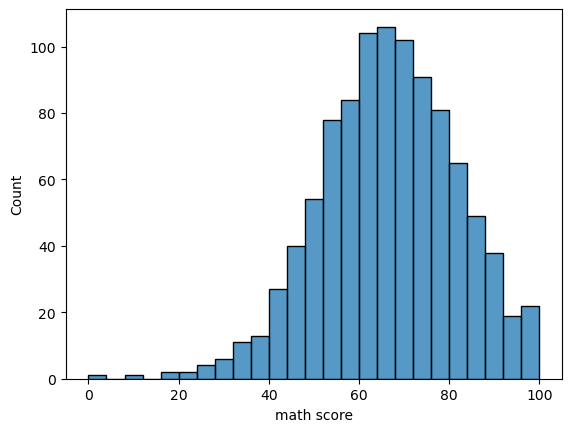

In [16]:
sns.histplot(data=df_sp, x='math score')

### 1.3. 분위수와 상자그림

`quantile()`을 활용해서 분위수를 계산  

최솟값(minimum, 0%), Q1(1st Quartile, 25%), 중앙값(median, 50%), Q3(3rd Quartile, 75%), 최댓값(maximum, 100%)을 사분위수(quartile)이라고 부르고, **상자그림(boxplot)** 으로 시각화

In [17]:
df_ins['charges'].quantile(0.1)

2346.5336150000003

In [18]:
df_ins['charges'].quantile([0.0, 0.25, 0.5, 0.75, 1.0])
    ## quantile( ) : 계산할 분위(1.0이 최댓값) 를 리스트로 묶기

0.00     1121.873900
0.25     4740.287150
0.50     9382.033000
0.75    16639.912515
1.00    63770.428010
Name: charges, dtype: float64

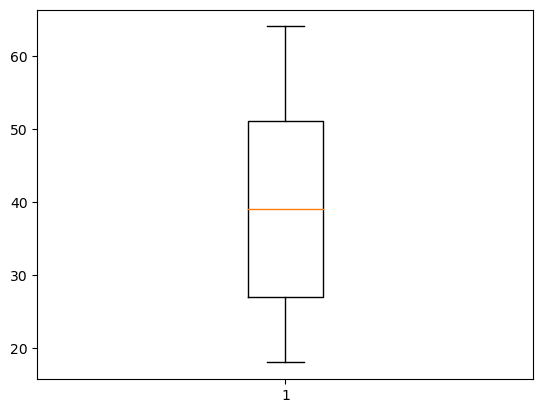

In [19]:
# matplotlib의 boxplot()으로 상자그림 그리기
plt.boxplot(df_ins['age'])
plt.show()

<Axes: ylabel='charges'>

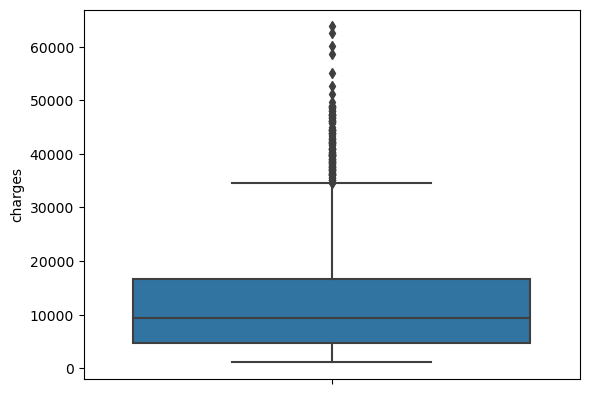

In [20]:
# boxplot( )을 활용한상자그림
sns.boxplot(data=df_ins,
            y='charges')

<br>


#### [실습]

1. df_sp에서 'reading score'의 Q1(25%), 중위수(median, 50%), Q3(75%) 계산하기
2. df_sp에서 'reading score'의 상자그림을 seaborn으로 그리기

<br>

## 2. 범주형 변수의 요약과 시각화  

범주형 변수는 정해진 수준(level) 중에 하나의 값을 갖기 때문에 분석 방법이 단순하며 개수를 세면 됨

<br>


### 2.1. 그룹별 건수 계산과 시각화

> SQL에서도 가장 잦은 키워드 조합이 `SELECT COUNT(1) ... GROUP BY ...`입니다.  

범주형 변수/그룹 변수로 수준별 관측치 수를 셀 수 있고, 막대그래프로 표현


In [21]:
# 수준(levels) 및 개수 확인 
df_ins['smoker'].unique()
# df_ins['smoker'].drop_duplicates()

array(['yes', 'no'], dtype=object)

In [22]:
df_ins['smoker'].nunique()

2

<br>

#### 2.1.1. 수준별 관측치 수 계산 및 막대그래프 작성

In [23]:
# 수준별 관측치 수 세기
df_ins['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

<Axes: xlabel='smoker'>

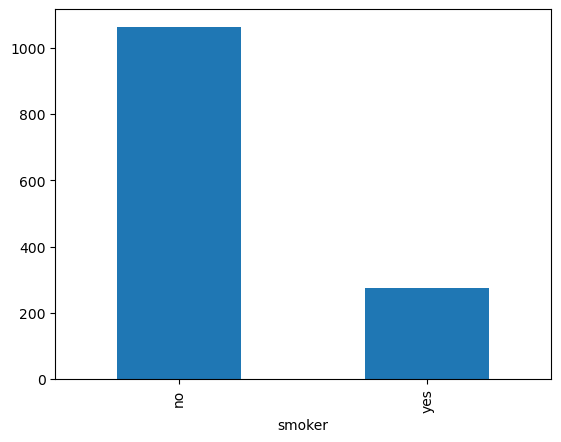

In [24]:
# plot( ) 메서드를 활용한 막대그래프 
df_ins['smoker'].value_counts().plot(kind='bar')

<Axes: xlabel='smoker', ylabel='count'>

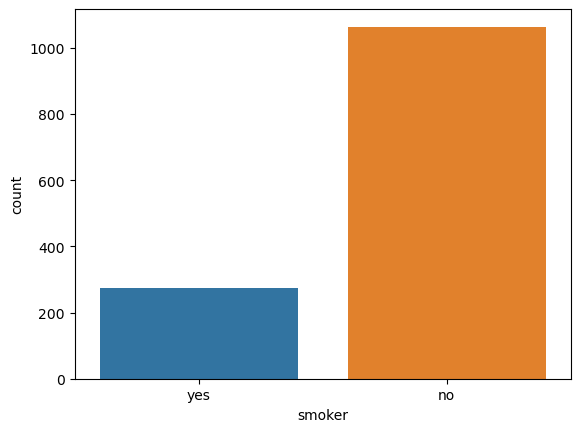

In [25]:
# seaborn을 활용한 막대그래프
sns.countplot(data=df_ins,
              x='smoker')

#### [실습]

1. 데이터 df_sp에서 'parental level of education'별 관측치 수를 계산하고 matplotlib 막대그래프 그리기
2. 'race/ethnicity'별 관측치 수를 계산하고, seaborn 막대그래프로 그리기

In [ ]:
df_sp.head()

<br>  

## 3. 산점도와 상관계수의 활용 

두 수치형 변수의 관계를 파악하기 위해서 **산점도(scatterplot)** 를 그리고 **상관계수(correlation coefficient)** 를 계산  

In [26]:
# 예제 데이터 불러오기
    # 아빠키와 아들키
df_heights = pd.read_csv('data/heights.csv')
df_heights

,father,son
0,165.223215,151.836806
1,160.657388,160.563662
2,164.986513,160.889747
3,167.011350,159.492645
4,155.288564,163.274070
...,...,...
1073,170.171897,179.710893
1074,181.182797,173.400060
1075,182.329176,176.036961
1076,179.675460,176.027055


171.92522603599258 174.45753692820037


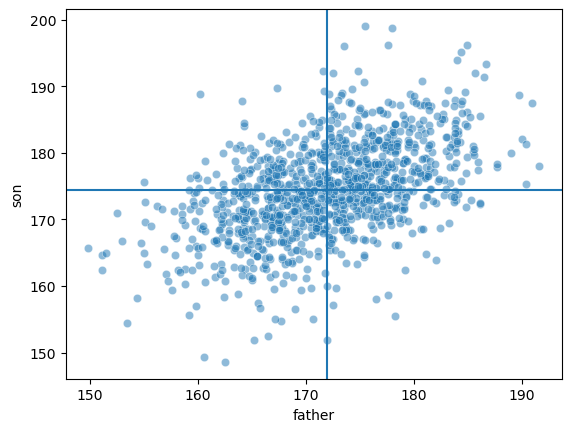

In [27]:
# seaborn으로 산점도 그리기
mean_f = df_heights['father'].mean()
mean_s = df_heights['son'].mean()
print(mean_f, mean_s)

# plt.figure(figsize=(10,10))

sns.scatterplot(data=df_heights, 
                x='father', 
                y='son', 
                alpha=0.5)
plt.axhline(mean_s) # 수평선 추가
plt.axvline(mean_f) # 수직선 추가
plt.show()


In [28]:
# 공분산 계산하기
df_heights[['father','son']].cov()

,father,son
father,48.608307,24.989192
son,24.989192,51.113092


In [29]:
# 상관계수 계산하기
df_heights[['father','son']].corr()

,father,son
father,1.000000,0.501338
son,0.501338,1.000000


#### [실습] 두 수치형 변수의 관계 탐색
 
1. df_sp에서 'math score'와 'reading score'의 산점도를 그리고 상관계수 계산하기
2. df_ins에서 'bmi'와 'charges'의 산점도를 그리고 상관계수 계산하기
3. (같이) df_ins에서 데이터 부분 선택을 활용해서 'bmi'와 'charges'의 상관계수를 'smoker'별로 나눠 계산하기

<Axes: xlabel='bmi', ylabel='charges'>

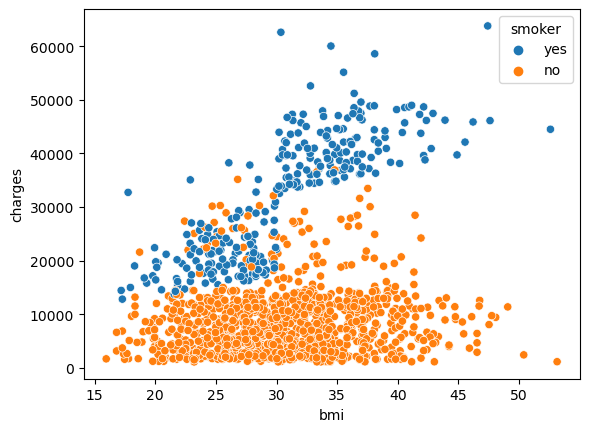

In [30]:
sns.scatterplot(data=df_ins,x='bmi', y='charges', hue='smoker')

<br>


## 4. 그룹별 집계값의 계산과 분포 비교

범주형 변수를 그룹처럼 활용해서 그룹별 평균을 계산하고, 그룹별 상자그림을 그려서 그룹간 분포를 비교  
한 변수의 집계에서 `groupby()`를 추가하면 되고, 필요에 따라 `agg()`를 활용 가능 

In [ ]:
# 전체 평균 계산
df_ins['charges'].mean()

In [ ]:
# 그룹별 평균 계산
df_ins.groupby('sex')['charges'].mean()

In [ ]:
# 그룹별 평균 계산(DataFrame 형식으로 출력)
df_ins.groupby('sex', as_index=False)['charges'].mean()

<br>

다양한 그룹 집계값의 계산 예제

In [32]:
# 여러개 그룹변수를 활용한 평균 계산
df_ins.groupby(['sex', 'smoker'], as_index=False)['charges'].mean()

,sex,smoker,charges
0,female,no,8762.297300
1,female,yes,30678.996276
2,male,no,8087.204731
3,male,yes,33042.005975


In [33]:
# 그룹별 여러 변수의 평균 계산 
df_ins.groupby('sex', as_index=False)[['charges', 'age']].mean()

,sex,charges,age
0,female,12569.578844,39.503021
1,male,13956.751178,38.917160


In [34]:
# 그룹별 한 변수의 여러 집계값 계산
df_ins.groupby('sex', as_index=False)['charges'].agg(['min','max','mean'])

,sex,min,max,mean
0,female,1607.5101,63770.42801,12569.578844
1,male,1121.8739,62592.87309,13956.751178


In [35]:
# 일반적인 그룹별 집계값 계산
df_ins.groupby('sex', as_index=False).agg({'age':['min','max','mean'], 'charges':['mean', 'median']})

sex age                      charges            
          min max       mean          mean      median
0  female  18  64  39.503021  12569.578844  9412.96250
1    male  18  64  38.917160  13956.751178  9369.61575

<br>

그룹 평균 등에 대응하는 그래프를 활용한 그룹 분포 비교

<Axes: xlabel='charges', ylabel='Count'>

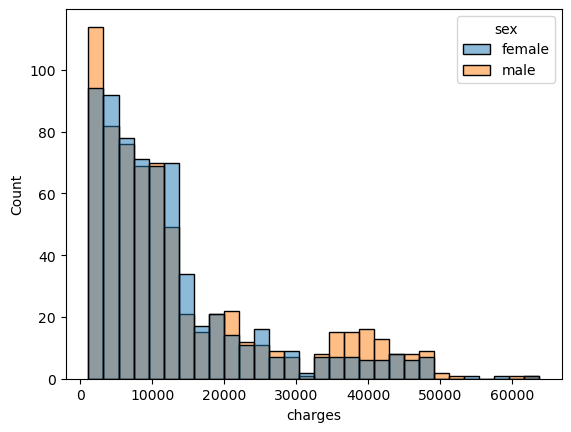

In [31]:
# 겹쳐그린 히스토그램 
sns.histplot(data=df_ins, 
             x = 'charges',
             hue='sex')

In [ ]:
# 많이 겹치기 어려운 히스토그램
sns.histplot(data=df_ins, 
             x = 'charges',
             hue='region')

In [ ]:
# 그룹별 상자그림 
sns.boxplot(data=df_ins,
            x='sex', 
            y='charges')

In [ ]:
sns.boxplot(data=df_ins,
            x='region', 
            y='charges')

In [ ]:
# hue를 추가로 활용한 상자그림
sns.boxplot(data=df_ins,
            x='region', 
            y='charges',
            hue='smoker')

#### [실습] 변수 관계 탐색

1. 데이터 df_sp에서 수치형 변수 하나와 범주형 변수 하나를 선택해서 그룹별 평균을 계산하고 상자그림 그리기
2. 데이터 df_sp에서 두 그룹 변수를 활용해서 `math score`의 평균을 계산하기
3. 2.의 세 변수를 x, y, hue로 활용해 seaborn으로 상자그림 그리기




In [ ]:
df_sp.head()

## 5. 피벗 테이블과 열지도의 활용

pandas의 *pivot_table()* 을 활용하면 Excel의 피벗테이블과 동일한 표 형태의 집계 가능

In [36]:
# pivot_table()을 활용한 교차표 작성
    ## values : 값 변수
    ## index  : 행 그룹변수
    ## columns: 열 그룹변수 
    ## aggfunc: 집계 함수
pd.pivot_table(df_ins, values='charges', index='sex', columns='region', aggfunc='size')

region,northeast,northwest,southeast,southwest
sex,,,,
female,161,164,175,162
male,163,161,189,163


In [37]:
# pivot_table()을 활용한 평균 피벗테이블
pd.pivot_table(df_ins, values='charges', index='sex', columns='region', aggfunc='mean')
pd.pivot_table(df_ins, 'charges', 'sex', 'region')

region,northeast,northwest,southeast,southwest
sex,,,,
female,12953.203151,12479.870397,13499.669243,11274.411264
male,13854.005374,12354.119575,15879.617173,13412.883576


In [38]:
# DataFrmae의 method, pivot_table()을 활용한 평균 피벗테이블
agg2_wide = df_ins.pivot_table(values='charges', index='sex', columns='region', aggfunc='mean')
agg2_wide

region,northeast,northwest,southeast,southwest
sex,,,,
female,12953.203151,12479.870397,13499.669243,11274.411264
male,13854.005374,12354.119575,15879.617173,13412.883576


In [39]:
# margins 옵션 활용
df_ins.pivot_table(values='charges', index='sex', columns='region', aggfunc='mean', margins=True) 

region,northeast,northwest,southeast,southwest,All
sex,,,,,
female,12953.203151,12479.870397,13499.669243,11274.411264,12569.578844
male,13854.005374,12354.119575,15879.617173,13412.883576,13956.751178
All,13406.384516,12417.575374,14735.411438,12346.937377,13270.422265


<Axes: xlabel='region', ylabel='sex'>

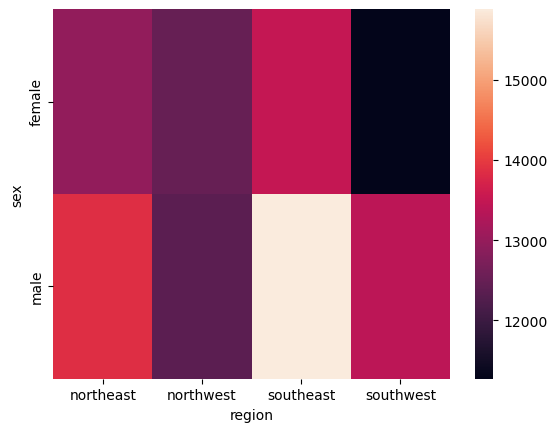

In [40]:
# 열지도 시각화
sns.heatmap(agg2_wide)

# sns.heatmap(agg2_wide, cmap='YlGnBu', annot=True, fmt='.2f')

* 참고: [Color Palette](https://seaborn.pydata.org/tutorial/color_palettes.html)

<br>

#### [실습] df_sp 활용

1. 'race/ethnicity', 'parental level of education'별 'math score'의 평균을 피벗테이블로 계산
2. 1.의 결과를 열지도로 시각화

In [ ]:
df_sp.head()

<br>

## 6. [참고]결과 데이터와 그래프의 저장

함수를 활용해서 분석 결과 데이터와 그래프를 저장 가능

In [41]:
# 폴더 생성
%mkdir result

In [42]:
# 대상 결과 데이터 확인
pt1 = df_ins.pivot_table(index='region', columns='smoker', values='charges', aggfunc='mean')
pt1

smoker,no,yes
region,,
northeast,9165.531672,29673.536473
northwest,8556.463715,30192.003182
southeast,8032.216309,34844.996824
southwest,8019.284513,32269.063494


In [43]:
# to_csv()로 결과 데이터를 csv 형식으로 저장하기
pt1.to_csv('result/result.csv', index=True)

<Axes: xlabel='smoker', ylabel='region'>

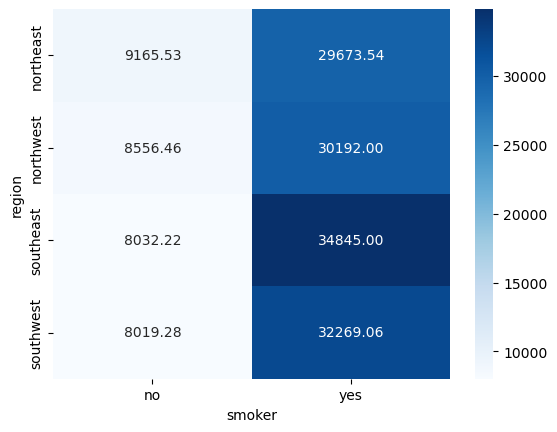

In [44]:
# 대상 그래프 확인
plot1 = sns.heatmap(pt1, cmap='Blues', annot=True, fmt='.2f')
plot1

In [45]:
# savefig()을 활용한 그래프 저장
plot1.figure.savefig('result/plot1.jpg')

#### End of script